In [88]:
from sklearn.metrics import accuracy_score
import math
import matplotlib.pyplot as plt
# import tensorflow as tf
import torch
from utils.helper import Extract
import torch.nn.functional as F
import numpy as np

In [31]:
class nnFC(nn.Module):
    def __init__(self):
        super(nnFC, self).__init__()
        
        self.linear1 = torch.nn.Linear(200,20)
        self.linear2 = torch.nn.Linear(20,10)
        
    def forward(self, x):
        
        h1_relu = F.relu(self.linear1(x))
        y_pred = F.relu(self.linear2(h1_relu))
        
        return y_pred

In [32]:
extractor = Extract()
df_list = extractor.extract_data_from_pdb('d1')
enc_df_list = extractor.get_one_hot_encoding(df_list)


In [60]:
model = nnFC()

In [68]:
batch_size = 32
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

allX, allY = extractor.get_training_data(enc_df_list)
xd,yd = allX.shape
# print(allX.shape)
split_indices = [i for i in range(batch_size,xd,batch_size)]
# print(len(split_indices))
batchXlist = np.split(allX,split_indices)[:-1]
batchYlist = np.split(allY,split_indices)[:-1]
# print(len(batchXlist))
num_batches=math.ceil(xd/batch_size)-1
batches = [(batchXlist[i],batchYlist[i]) for i in range(num_batches)]

# print(num_batches)

for epoch in range(500):
    #shuffle dataset
    np.random.shuffle(batches)
    total_epoch_loss = 0
    for i in range(num_batches):
        batchX, batchY = batches[i]
#         print(i,batchX.shape)
        tensorX = torch.tensor(batchX,dtype=torch.float).view(batch_size,200)
        tensorY = torch.tensor(batchY,dtype=torch.float).view(batch_size,10)
        
        #Compute Loss
        y_pred = model(tensorX)
        loss = torch.sqrt(criterion(y_pred,tensorY))  #@TODO is this correct?
        
        #Zero gradients, perform backward pass, up(date weights
        optimizer.zero_grad()
        loss.backward()  #@TODO is this correct?
        optimizer.step()
        total_epoch_loss += loss.item()
    avg_epoch_loss = total_epoch_loss/num_batches
    print("Epoch: {} Current Loss: {} Avg Loss: {}".format(epoch+1, loss.item(), avg_epoch_loss))
        

Epoch: 1 Current Loss: 7.248237609863281 Avg Loss: 4.844344326770123
Epoch: 2 Current Loss: 5.322131633758545 Avg Loss: 4.845516283141107
Epoch: 3 Current Loss: 3.283268451690674 Avg Loss: 4.843929742598355
Epoch: 4 Current Loss: 4.50963020324707 Avg Loss: 4.84484634996981
Epoch: 5 Current Loss: 2.8628952503204346 Avg Loss: 4.83888931256928
Epoch: 6 Current Loss: 0.6949483752250671 Avg Loss: 4.841276408762348
Epoch: 7 Current Loss: 6.214611530303955 Avg Loss: 4.84018089812325
Epoch: 8 Current Loss: 6.320980548858643 Avg Loss: 4.840876815840602
Epoch: 9 Current Loss: 2.362967014312744 Avg Loss: 4.839404783838866
Epoch: 10 Current Loss: 4.9598588943481445 Avg Loss: 4.837213752069036
Epoch: 11 Current Loss: 4.088082790374756 Avg Loss: 4.837062574238802
Epoch: 12 Current Loss: 4.16250467300415 Avg Loss: 4.833862147198952
Epoch: 13 Current Loss: 6.11396598815918 Avg Loss: 4.834494577074538
Epoch: 14 Current Loss: 5.741735458374023 Avg Loss: 4.83267558639755
Epoch: 15 Current Loss: 5.6917290

Epoch: 118 Current Loss: 3.7999019622802734 Avg Loss: 4.747738042428177
Epoch: 119 Current Loss: 9.263297080993652 Avg Loss: 4.742869973904928
Epoch: 120 Current Loss: 5.013819217681885 Avg Loss: 4.744763316092443
Epoch: 121 Current Loss: 3.9215073585510254 Avg Loss: 4.742577053302405
Epoch: 122 Current Loss: 6.960123062133789 Avg Loss: 4.741971898728943
Epoch: 123 Current Loss: 0.059924643486738205 Avg Loss: 4.741407801530191
Epoch: 124 Current Loss: 5.750103950500488 Avg Loss: 4.740513942527528
Epoch: 125 Current Loss: 3.3785107135772705 Avg Loss: 4.739069378155531
Epoch: 126 Current Loss: 0.305053174495697 Avg Loss: 4.738245429965306
Epoch: 127 Current Loss: 5.956720352172852 Avg Loss: 4.737626785469451
Epoch: 128 Current Loss: 5.707124710083008 Avg Loss: 4.7382532097209165
Epoch: 129 Current Loss: 5.918698787689209 Avg Loss: 4.735137252868818
Epoch: 130 Current Loss: 4.548670291900635 Avg Loss: 4.734233233992162
Epoch: 131 Current Loss: 3.9649229049682617 Avg Loss: 4.73440697682755

Epoch: 233 Current Loss: 3.444103717803955 Avg Loss: 4.669625165169032
Epoch: 234 Current Loss: 5.066166400909424 Avg Loss: 4.669725959398309
Epoch: 235 Current Loss: 5.9649271965026855 Avg Loss: 4.668600086293811
Epoch: 236 Current Loss: 3.0384888648986816 Avg Loss: 4.668581413675327
Epoch: 237 Current Loss: 6.220888614654541 Avg Loss: 4.6693144663218025
Epoch: 238 Current Loss: 4.298705577850342 Avg Loss: 4.668080874319587
Epoch: 239 Current Loss: 5.163054943084717 Avg Loss: 4.667159507611805
Epoch: 240 Current Loss: 3.9752962589263916 Avg Loss: 4.665643305384687
Epoch: 241 Current Loss: 6.859644412994385 Avg Loss: 4.664785990168397
Epoch: 242 Current Loss: 6.17921257019043 Avg Loss: 4.666094942379515
Epoch: 243 Current Loss: 6.380044937133789 Avg Loss: 4.664171185420484
Epoch: 244 Current Loss: 7.5532050132751465 Avg Loss: 4.6636269426315415
Epoch: 245 Current Loss: 6.169963836669922 Avg Loss: 4.664188162176584
Epoch: 246 Current Loss: 5.751377582550049 Avg Loss: 4.661549340679349
E

Epoch: 348 Current Loss: 4.866345405578613 Avg Loss: 4.611402973100277
Epoch: 349 Current Loss: 6.59420919418335 Avg Loss: 4.611144814326675
Epoch: 350 Current Loss: 4.5287933349609375 Avg Loss: 4.61253976846608
Epoch: 351 Current Loss: 5.166408538818359 Avg Loss: 4.611100133242352
Epoch: 352 Current Loss: 4.640944957733154 Avg Loss: 4.610130727186571
Epoch: 353 Current Loss: 5.83769416809082 Avg Loss: 4.611347148384975
Epoch: 354 Current Loss: 3.20599102973938 Avg Loss: 4.61059171178055
Epoch: 355 Current Loss: 4.516607761383057 Avg Loss: 4.608870333592806
Epoch: 356 Current Loss: 4.115865707397461 Avg Loss: 4.608807119787956
Epoch: 357 Current Loss: 0.6568238735198975 Avg Loss: 4.6085274801874645
Epoch: 358 Current Loss: 6.181263446807861 Avg Loss: 4.606995945606305
Epoch: 359 Current Loss: 5.009924411773682 Avg Loss: 4.607256525899379
Epoch: 360 Current Loss: 5.21022367477417 Avg Loss: 4.605429385351587
Epoch: 361 Current Loss: 4.897550582885742 Avg Loss: 4.606007693905611
Epoch: 36

Epoch: 465 Current Loss: 0.8037852644920349 Avg Loss: 4.562021142442007
Epoch: 466 Current Loss: 4.822781562805176 Avg Loss: 4.560553629388463
Epoch: 467 Current Loss: 6.603248596191406 Avg Loss: 4.561259127925245
Epoch: 468 Current Loss: 5.852329254150391 Avg Loss: 4.560858983850601
Epoch: 469 Current Loss: 6.635741233825684 Avg Loss: 4.56220960532011
Epoch: 470 Current Loss: 5.542572975158691 Avg Loss: 4.559873384100442
Epoch: 471 Current Loss: 0.6154995560646057 Avg Loss: 4.560497037553209
Epoch: 472 Current Loss: 5.7672247886657715 Avg Loss: 4.557699087750623
Epoch: 473 Current Loss: 6.15457820892334 Avg Loss: 4.559430795284558
Epoch: 474 Current Loss: 2.9350080490112305 Avg Loss: 4.559236527135481
Epoch: 475 Current Loss: 6.435641765594482 Avg Loss: 4.558278889148211
Epoch: 476 Current Loss: 0.6387813091278076 Avg Loss: 4.558231112775298
Epoch: 477 Current Loss: 0.12125956267118454 Avg Loss: 4.558277290998673
Epoch: 478 Current Loss: 2.0673372745513916 Avg Loss: 4.55769226285724
E

In [69]:
predictions = model(torch.tensor(allX,dtype=torch.float).view(3156,200))

In [78]:
print(predictions[1000])
print(allY[1000])

tensor([0.1013, 0.0757, 0.0038, 0.0000, 0.0000, 0.0066, 0.0042, 0.0167, 0.0000,
        0.0000], grad_fn=<SelectBackward>)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [80]:
allY.shape

(3156, 10)

In [82]:
# protein
p = []
y = []
for i in range(0, len(enc_df_list[0])-9):
    p.append(predictions[i][5])
    y.append(allY[i][5])

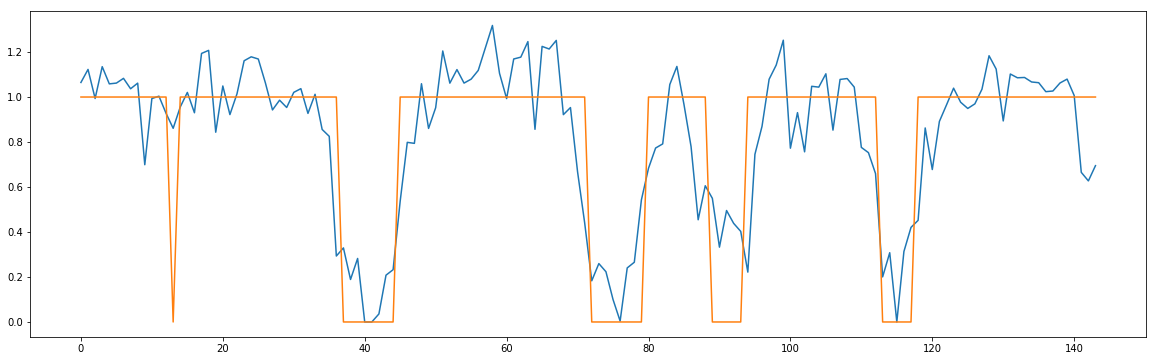

In [83]:
plt.figure(figsize=(20, 6))
plt.plot(p)
plt.plot(y)

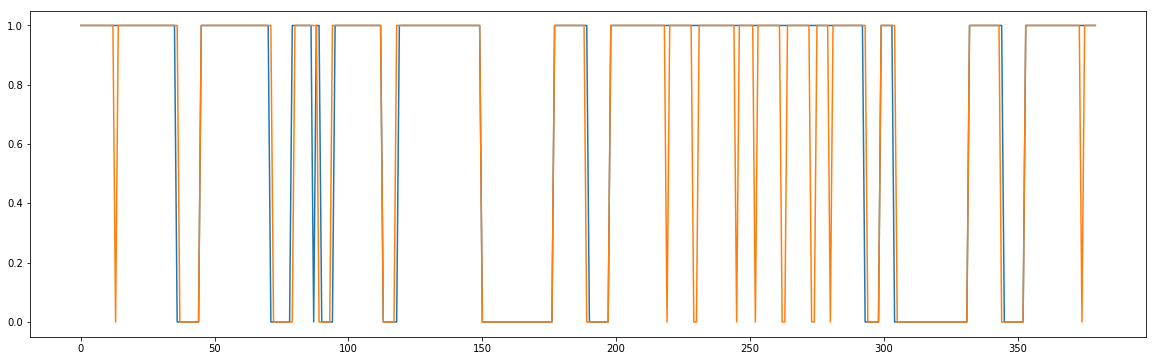

In [94]:
p = []
y = []
for i in range(0, len(enc_df_list[6])-9):
    p.append(round((predictions[i][5]).item()))
    y.append(allY[i][5])
    
plt.figure(figsize=(20, 6))
plt.plot(p)
plt.plot(y)

In [95]:
accuracy_score(y, p)

0.9394736842105263

In [136]:
import pandas as pd
import numpy as np
import os
from biopandas.pdb import PandasPdb as ppdb

class Extract_Test:
  def __init__(self):
    self.refer_protein = {
      'ALA': 0,
      'GLY': 1,
      'ILE': 2,
      'LEU': 3,
      'PRO': 4,
      'VAL': 5,
      'PHE': 6,
      'TRP': 7,
      'TYR': 8,
      'ASP': 9,
      'GLU': 10,
      'ARG': 11,
      'HIS': 12,
      'LYS': 13,
      'SER': 14,
      'THR': 15,
      'CYS': 16,
      'MET': 17,
      'MSE': 17,
      'MSO': 17,
      'ASN': 18,
      'GLN': 19
    }


  def get_training_data(self, df_list):
    """
    Creates X and Y vector for training neural network
    from the given list of dataframes with a sliding window of
    10
    :param df_list: List of dataframes
    :return: X vector and Y vector <numpy arrays>
    """
    X = []
    Y = []
    for df in df_list:
      # get 10 rows at a time
      for i in range(0, len(df) - 9):
        ip = df[i:i + 10]
        label = ip['helix']
        input_vector = ip.drop(['helix'], axis=1)
        flattened_ip_vector = input_vector.values.flatten()
        X.append(flattened_ip_vector)
        Y.append(label.values)

    X = np.array(X)
    Y = np.array(Y)
    return X, Y


  def get_one_hot_encoding(self, df_list):
    """
    Creates one hot encoding for all the acids in each dataframe
    in the given list of the dataframes
    :param df_list: List of dataframes
    :return: List of dataframes with one hot encoding
    """
    # https://stackoverflow.com/a/37426982
    df2_list = []
    rejected_proteins = 0
    for df in df_list:
      if df != None:  
          df2 = df.drop(['acids'], axis=1)
          hot_encode = pd.get_dummies(df['acid_num'], dtype=float)
          hot_encode = hot_encode.T.reindex([i for i in range(0, 20)]).T.fillna(0)
          df2 = df2.drop(['acid_num'], axis=1)
          df2 = pd.concat([df2, hot_encode], axis=1)
          df2_list.append(df2)
      else:
        rejected_proteins += 1

    print("Percentage Rejected: ", (rejected_proteins/len(df_list))*100)    
    return df2_list


  def extract_data_from_pdb(self, dir):
    """
    Extracts data from all the pdb files in the given directory and
    returns a list of dataframes
    :param dir: Name of the directory <string>
    :return: list of dataframes for each pdb file in the given directory
    """
    files_list = [f for f in os.listdir('./data/' + dir)]
    df_list = [self.extract_single_pdb('./data/' + dir + "/" + f) for f in files_list]

    return df_list


  def extract_single_pdb(self, f):
    """
    Extracts data from single pdb file and displays in pandas dataframe
    :param f: name of the file <string>
    :return: pandas dataframe
    """
    data = ppdb().read_pdb(f)

    # read starting helix range
    dbref = data.df['OTHERS'][data.df['OTHERS']['record_name'] == 'DBREF']['entry']
    if len(dbref) == 0:
      dbref = data.df['OTHERS'][data.df['OTHERS']['record_name'] == 'DBREF2']['entry']
      if len(dbref) == 0:
        return
      start_range = dbref[dbref.first_valid_index()][39:49]
    else:
      start_range = dbref[dbref.first_valid_index()][49:54]

    # get the helic ranges
    helix_ranges = []
    for string in data.df['OTHERS'][data.df['OTHERS']['record_name'] == 'HELIX']['entry']:
      # Only get for model A
      if (string[13].strip() == 'A'):
        start = int(string[16:19]) - int(start_range)
        end = int(string[28:31]) - int(start_range)
        helix_ranges.append((start, end))

    # gets the amino acids sequences
    final_str = []
    for string in data.df['OTHERS'][data.df['OTHERS']['record_name'] == 'SEQRES']['entry']:
      # Only get for model A
      if (string[5].strip() == 'A'):
        final_str.extend(string[13:].split(sep=' '))

    # create the labels
    label = np.zeros(len(final_str))
    for st, end in helix_ranges:
      for i in range(st, end + 1):
        label[i] = 1

    # create the dataframe
    df = pd.DataFrame({'acids': final_str, 'helix': label})
    bad_protein_flag = False
    
    def get_refer_protein(x):
#         print(x)
#         print(x in self.refer_protein)
        if x in self.refer_protein:
            return self.refer_protein[x]
        else: 
#             bad_protein_flag=True
            return np.NaN
        
    df['acid_num'] = df['acids'].apply(get_refer_protein)
    
    if df['acid_num'].isna().any():
        return df
    else:
        return None
    
#     print(bad_protein_flag)
#     if not bad_protein_flag:
# #         print("Extracted: ", f)
#         return df
#     else:
# #         print("Bad Protein: ", f)
#         return None


In [137]:
extractor_test = Extract_Test()
df_list_test = extractor_test.extract_data_from_pdb('d2')
enc_df_list_test = extractor_test.get_one_hot_encoding(df_list_test)
allX_test, allY_test = extractor_test.get_training_data(enc_df_list_test)

IndexError: index -289 is out of bounds for axis 0 with size 35